# General Overview - Machine Learning

For this binary classification problem, we are using Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier, Gaussian Naive Bayes. To assess the accuracy, we look at the accuracy scores and classification reports.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from collections import Counter

from sklearn.model_selection import (cross_val_score, GridSearchCV, train_test_split, KFold)
from sklearn.metrics import (classification_report, confusion_matrix, plot_precision_recall_curve, precision_recall_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import (RandomUnderSampler, EditedNearestNeighbours, NearMiss)

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
np.random.seed(42)

In [3]:
data = pd.read_csv('diabetes_ml_scale.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64360 entries, 0 to 64359
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                64360 non-null  int64  
 1   diabetesMed           64360 non-null  int64  
 2   time_in_hospital      64360 non-null  float64
 3   num_lab_procedures    64360 non-null  float64
 4   num_procedures        64360 non-null  float64
 5   num_medications       64360 non-null  float64
 6   num_outpatient        64360 non-null  float64
 7   num_inpatient         64360 non-null  float64
 8   num_diagnoses         64360 non-null  float64
 9   change                64360 non-null  int64  
 10  AfricanAmerican       64360 non-null  int64  
 11  Asian                 64360 non-null  int64  
 12  Caucasian             64360 non-null  int64  
 13  Hispanic              64360 non-null  int64  
 14  Other_race            64360 non-null  int64  
 15  [0-10)             

In [5]:
diabetes.head()

,gender,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses,change,...,Steady_pioglitazone,Up_pioglitazone,Down_rosiglitazone,Steady_rosiglitazone,Up_rosiglitazone,Down_insulin,No_insulin,Steady_insulin,Up_insulin,readmitted
0,1,1,0.166667,0.568627,0.000000,0.435897,0.000000,0.0,0.636364,1,...,0,0,0,0,0,0,0,0,1,YES
1,1,1,0.083333,0.098039,0.833333,0.307692,0.666667,0.5,0.363636,0,...,0,0,0,0,0,0,1,0,0,NO
2,0,1,0.083333,0.421569,0.166667,0.384615,0.000000,0.0,0.454545,1,...,0,0,0,0,0,0,0,0,1,NO
3,0,1,0.000000,0.490196,0.000000,0.179487,0.000000,0.0,0.272727,1,...,0,0,0,0,0,0,0,1,0,NO
4,0,1,0.166667,0.294118,1.000000,0.384615,0.000000,0.0,0.636364,0,...,0,0,0,0,0,0,0,1,0,YES


In [6]:
# # precision recall curve - archived
# def precision_recall_curve(model):
#     plot_precision_recall_curve(model, X_test, y_test)
#     plt.show()

## separate features and target variable

In [7]:
y = diabetes['readmitted'].values # target variable
X = diabetes.drop('readmitted', axis=1).values # features

## initializing PCA

After converting the dataset to all numerical features, the table took on a large number of columns. In order to reduce dimensionality, we are using Principal Component Analysis, or PCA, on our feature variables. This makes the data easier to interpret by reducing superfluous influences.

In [8]:
# reduce dimensionality using PCA
pca = PCA(random_state=42)
pca.fit(X)
exp_variance = pca.explained_variance_ratio_

print('Explained variance ratio : \n{}'.format(pca.explained_variance_ratio_))
print('Number of components = {}'.format(pca.n_components_))

Explained variance ratio : 
[1.26892257e-01 7.31223602e-02 6.17734712e-02 6.08983118e-02
 5.49778184e-02 5.11779819e-02 4.66325535e-02 4.26361140e-02
 3.90225809e-02 3.54127389e-02 3.46552713e-02 2.62549147e-02
 2.41814494e-02 2.28730260e-02 2.14368018e-02 2.06446811e-02
 1.88580270e-02 1.77557944e-02 1.59202279e-02 1.49032415e-02
 1.42871412e-02 1.41350728e-02 1.39895054e-02 1.34459978e-02
 1.21426627e-02 1.13463475e-02 9.97516799e-03 9.63986704e-03
 8.84150073e-03 8.62847585e-03 8.22213194e-03 7.74910879e-03
 7.00806550e-03 6.47265596e-03 5.74134473e-03 5.51075417e-03
 4.23580649e-03 3.89193144e-03 3.61808967e-03 3.45611070e-03
 2.56913277e-03 2.53425851e-03 2.36888395e-03 1.91602574e-03
 1.68500899e-03 1.51504575e-03 1.25397669e-03 1.06998969e-03
 5.64762291e-04 5.46049954e-04 4.08321716e-04 4.07088848e-04
 2.40907048e-04 2.23050360e-04 2.06119368e-04 8.95318087e-05
 3.44850323e-05 3.46867952e-32 1.21786656e-32 6.79371339e-33
 2.26715626e-33 1.44538420e-33 1.30875407e-33]
Number of 

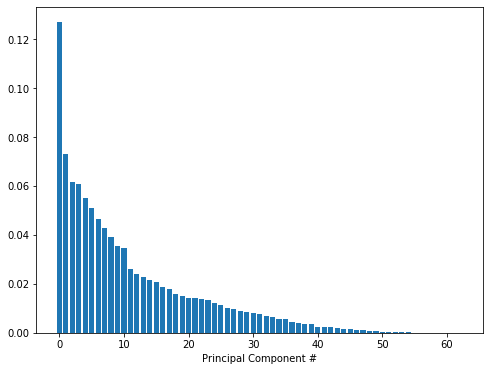

In [9]:
# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
plt.show()

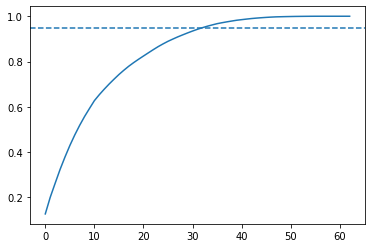

In [10]:
# calculate cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# plotting cumulative explained variance and draw a dashed line at 0.95, representing 95% of explained variance
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.95, linestyle='--')
plt.show()

In [11]:
# n_components where ~95% of variance is explainable
n_components = 34

# initialize PCA and project data onto components
pca = PCA(n_components, random_state=42)
pca.fit(X)
pca_X = pca.transform(X)

In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(45052, 34) (45052,)
(19308, 34) (19308,)


### logistic regression

In [13]:
# parameter tuning - C
logreg = LogisticRegression(random_state=42)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(logreg, parameters, cv=5, verbose=1, n_jobs=-1)
clf.fit(pca_X, y).best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.9s finished


{'C': 10}

In [14]:
logreg = LogisticRegression(random_state=42, C=10)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set: ', logreg.score(X_train, y_train))
print('Accuracy Score, Test Set: ', logreg.score(X_test, y_test))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test, logreg_pred)))

Accuracy Score, Training Set:  0.6216150226405043
Accuracy Score, Test Set:  0.621089703749741
Classification Report 

               precision    recall  f1-score   support

          NO       0.63      0.91      0.74     11713
         YES       0.56      0.18      0.27      7595

    accuracy                           0.62     19308
   macro avg       0.59      0.54      0.51     19308
weighted avg       0.60      0.62      0.56     19308



### decision tree classifier

In [15]:
# hyperparameter tuning
decision_tree = DecisionTreeClassifier(random_state=42)

criterion = ['gini', 'entropy']
max_depth = [2, 4, 5, 8, 10]
min_samples_split = [2, 4, 8, 10]
min_samples_leaf = [2, 4, 6, 8]

parameters = dict(max_depth=max_depth, criterion=criterion, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

dt_gs = GridSearchCV(decision_tree, parameters, cv=5, verbose=1, n_jobs=-1)
dt_gs.fit(pca_X, y).best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  5.1min finished


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [16]:
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_leaf=6, min_samples_split=2)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set: {}'.format(decision_tree.score(X_train, y_train)))
print('Accuracy Score, Test Set: {}'.format(decision_tree.score(X_test, y_test)))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test, decision_tree_pred)))

Accuracy Score, Training Set: 0.6257213886175974
Accuracy Score, Test Set: 0.617930391547545
Classification Report 

               precision    recall  f1-score   support

          NO       0.63      0.92      0.75     11713
         YES       0.55      0.15      0.23      7595

    accuracy                           0.62     19308
   macro avg       0.59      0.54      0.49     19308
weighted avg       0.60      0.62      0.54     19308



### random forest classifier

In [17]:
# # parameter tuning - takes a long time to run
# criterion = ['gini', 'entropy']
# n_estimators = [100, 150, 200, 250]
# max_depth = [10, 15, 20, 25]

# parameters = dict(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)

# forest = RandomForestClassifier(random_state=42)
# forest_gs = GridSearchCV(forest, parameters, cv=5, verbose=1, n_jobs=-1)
# forest_gs.fit(pca_X, y).best_params_

In [18]:
forest = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=10, n_estimators=200)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', forest.score(X_train, y_train))
print('Accuracy Score, Test Set:', forest.score(X_test, y_test))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test, forest_pred)))

Accuracy Score, Training Set: 0.6677173044481932
Accuracy Score, Test Set: 0.6203646157033355
Classification Report 

               precision    recall  f1-score   support

          NO       0.62      0.94      0.75     11713
         YES       0.58      0.13      0.22      7595

    accuracy                           0.62     19308
   macro avg       0.60      0.53      0.48     19308
weighted avg       0.61      0.62      0.54     19308



### SVC

In [19]:
# SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', svc.score(X_train, y_train))
print('Accuracy Score, Test Set:', svc.score(X_test, y_test))
    
# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test, svc_pred)))

Accuracy Score, Training Set: 0.6492497558376986
Accuracy Score, Test Set: 0.619276983633727
Classification Report 

               precision    recall  f1-score   support

          NO       0.63      0.92      0.75     11713
         YES       0.56      0.16      0.25      7595

    accuracy                           0.62     19308
   macro avg       0.59      0.54      0.50     19308
weighted avg       0.60      0.62      0.55     19308



# Random Under Sampler

The random under sampler method randomly (but not too random, we set the random state to 42 for consistent results) removes samples from the majority class until its size is equal to the minority class. We then train and test our models using this new set of data.

In [20]:
# separate features and target variable
y = diabetes['readmitted'].values # target variable
X = diabetes.drop('readmitted', axis=1).values # features

# initialize
under_sampler = RandomUnderSampler(random_state=42)
X_rus, y_rus = under_sampler.fit_sample(X, y)

print('Random undersampling {}'.format(Counter(y_rus)))

# perform PCA on features
X_rus = pca.fit_transform(X_rus)

# refine train, test, split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)

print(X_train_rus.shape, y_train_rus.shape)
print(X_test_rus.shape, y_test_rus.shape)

Random undersampling Counter({'NO': 25318, 'YES': 25318})
(35445, 34) (35445,)
(15191, 34) (15191,)


### logistic regression

In [21]:
# # parameter tuning - C=0.001
# logreg = LogisticRegression(random_state=42)

# parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}
# clf = GridSearchCV(logreg, parameters, cv=5, verbose=1, n_jobs=-1)
# clf.fit(X_rus, y_rus).best_params_

In [22]:
logreg = LogisticRegression(random_state=42, C=0.001)
logreg.fit(X_train_rus, y_train_rus)
logreg_pred = logreg.predict(X_test_rus)

# accuracy scores
print('Accuracy Score, Training Set: ', logreg.score(X_train_rus, y_train_rus))
print('Accuracy Score, Test Set: ', logreg.score(X_test_rus, y_test_rus))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_rus, logreg_pred)))

Accuracy Score, Training Set:  0.5741571448723374
Accuracy Score, Test Set:  0.5719834112303338
Classification Report 

               precision    recall  f1-score   support

          NO       0.57      0.58      0.57      7596
         YES       0.57      0.57      0.57      7595

    accuracy                           0.57     15191
   macro avg       0.57      0.57      0.57     15191
weighted avg       0.57      0.57      0.57     15191



### decision tree classifier

In [23]:
# # parameter tuning - takes a long time
# decision_tree = DecisionTreeClassifier(random_state=42)

# criterion = ['gini', 'entropy']
# max_depth = [2, 4, 5, 8, 10]
# min_samples_split = [2, 8, 14, 16]
# min_samples_leaf = [1, 2, 4, 6]

# parameters = dict(max_depth=max_depth, criterion=criterion, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# dt_gs = GridSearchCV(decision_tree, parameters, cv=5, verbose=1, n_jobs=-1)
# dt_gs.fit(X_rus, y_rus).best_params_

In [24]:
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split=2)
decision_tree.fit(X_train_rus, y_train_rus)
decision_tree_pred = decision_tree.predict(X_test_rus)

# accuracy scores
print('Accuracy Score, Training Set: {}'.format(decision_tree.score(X_train_rus, y_train_rus)))
print('Accuracy Score, Test Set: {}'.format(decision_tree.score(X_test_rus, y_test_rus)))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_rus, decision_tree_pred)))

Accuracy Score, Training Set: 0.5643673296656793
Accuracy Score, Test Set: 0.5593443486274768
Classification Report 

               precision    recall  f1-score   support

          NO       0.56      0.52      0.54      7596
         YES       0.55      0.60      0.58      7595

    accuracy                           0.56     15191
   macro avg       0.56      0.56      0.56     15191
weighted avg       0.56      0.56      0.56     15191



### random forest classifier

In [25]:
# # parameter tuning - takes a long time
# forest = RandomForestClassifier(random_state=42)

# criterion = ['gini', 'entropy']
# n_estimators = [50, 80, 100, 140, 200]
# max_depth = [10, 15, 18, 20, 30]

# parameters = dict(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)

# forest_gs = GridSearchCV(forest, parameters, cv=5, verbose=1, n_jobs=-1)
# forest_gs.fit(X_rus, y_rus).best_params_

In [26]:
forest = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=10, n_estimators=200)
forest.fit(X_train_rus, y_train_rus)
forest_pred = forest.predict(X_test_rus)

# accuracy scores
print('Accuracy Score, Training Set:', forest.score(X_train_rus, y_train_rus))
print('Accuracy Score, Test Set:', forest.score(X_test_rus, y_test_rus))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_rus, forest_pred)))

Accuracy Score, Training Set: 0.7242770489490761
Accuracy Score, Test Set: 0.5811335659271938
Classification Report 

               precision    recall  f1-score   support

          NO       0.58      0.59      0.59      7596
         YES       0.58      0.57      0.58      7595

    accuracy                           0.58     15191
   macro avg       0.58      0.58      0.58     15191
weighted avg       0.58      0.58      0.58     15191



### Gaussian Naive Bayes

In [27]:
gaussian = GaussianNB()
gaussian.fit(X_train_rus, y_train_rus)
gaussian_pred = gaussian.predict(X_test_rus)

# accuracy scores
print('Accuracy Score, Training Set:', gaussian.score(X_train_rus, y_train_rus))
print('Accuracy Score, Test Set:', gaussian.score(X_test_rus, y_test_rus))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_rus, gaussian_pred)))

Accuracy Score, Training Set: 0.570094512625194
Accuracy Score, Test Set: 0.5700085576986373
Classification Report 

               precision    recall  f1-score   support

          NO       0.56      0.61      0.59      7596
         YES       0.58      0.53      0.55      7595

    accuracy                           0.57     15191
   macro avg       0.57      0.57      0.57     15191
weighted avg       0.57      0.57      0.57     15191



### SVC

In [28]:
# SVC
svc = SVC(random_state=42)
svc.fit(X_train_rus, y_train_rus)
svc_pred = svc.predict(X_test_rus)

# accuracy scores
print('Accuracy Score, Training Set:', svc.score(X_train_rus, y_train_rus))
print('Accuracy Score, Test Set:', svc.score(X_test_rus, y_test_rus))
    
# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_rus, svc_pred)))

Accuracy Score, Training Set: 0.6409648751586966
Accuracy Score, Test Set: 0.5721808965835034
Classification Report 

               precision    recall  f1-score   support

          NO       0.57      0.57      0.57      7596
         YES       0.57      0.57      0.57      7595

    accuracy                           0.57     15191
   macro avg       0.57      0.57      0.57     15191
weighted avg       0.57      0.57      0.57     15191



## Edited Nearest Neighbors

In [29]:
y = diabetes['readmitted'].values # target variable
X = diabetes.drop('readmitted', axis=1).values # features

# initialize
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)

print('Resampled dataset shape: {}'.format(Counter(y_enn)))

# apply PCA to features
X_enn = pca.fit_transform(X_enn)

# train test split
X_train_enn, X_test_enn, y_train_enn, y_test_enn = train_test_split(X_enn, y_enn, test_size=0.3, random_state=42, stratify=y_enn)

print(X_train_enn.shape, y_train_enn.shape)
print(X_test_enn.shape, y_test_enn.shape)

Resampled dataset shape: Counter({'YES': 25318, 'NO': 10348})
(24966, 34) (24966,)
(10700, 34) (10700,)


### logistic regression

In [30]:
# # parameter tuning - C
# logreg = LogisticRegression(random_state=42)

# parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}
# clf = GridSearchCV(logreg, parameters, cv=5, verbose=1, n_jobs=-1)
# clf.fit(X_enn, y_enn).best_params_

In [31]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_enn, y_train_enn)
logreg_pred = logreg.predict(X_test_enn)

# accuracy scores
print('Accuracy Score, Training Set: ', logreg.score(X_train_enn, y_train_enn))
print('Accuracy Score, Test Set: ', logreg.score(X_test_enn, y_test_enn))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_enn, logreg_pred)))

Accuracy Score, Training Set:  0.7287911559721221
Accuracy Score, Test Set:  0.7281308411214953
Classification Report 

               precision    recall  f1-score   support

          NO       0.60      0.20      0.29      3104
         YES       0.74      0.95      0.83      7596

    accuracy                           0.73     10700
   macro avg       0.67      0.57      0.56     10700
weighted avg       0.70      0.73      0.68     10700



### decision tree classifier

In [32]:
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=2)
decision_tree.fit(X_train_enn, y_train_enn)
decision_tree_pred = decision_tree.predict(X_test_enn)

# accuracy scores
print('Accuracy Score, Training Set: {}'.format(decision_tree.score(X_train_enn, y_train_enn)))
print('Accuracy Score, Test Set: {}'.format(decision_tree.score(X_test_enn, y_test_enn)))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_enn, decision_tree_pred)))

Accuracy Score, Training Set: 0.72422494592646
Accuracy Score, Test Set: 0.7176635514018691
Classification Report 

               precision    recall  f1-score   support

          NO       0.55      0.15      0.23      3104
         YES       0.73      0.95      0.83      7596

    accuracy                           0.72     10700
   macro avg       0.64      0.55      0.53     10700
weighted avg       0.68      0.72      0.65     10700



### random forest classifier

In [33]:
# # random forest
# forest = RandomForestClassifier(random_state=42)

# # parameter tuning
# criterion = ['gini', 'entropy']
# n_estimators = [100, 200, 350, 400]
# max_depth = [10, 15, 20, 30]

# parameters = dict(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)

# forest_gs = GridSearchCV(forest, parameters, cv=5, verbose=1, n_jobs=-1)
# forest_gs.fit(X_enn, y_enn).best_params_

In [34]:
forest = RandomForestClassifier(random_state=42, criterion='gini', max_depth=10, n_estimators=200)
forest.fit(X_train_enn, y_train_enn)
forest_pred = forest.predict(X_test_enn)

# accuracy scores
print('Accuracy Score, Training Set:', forest.score(X_train_enn, y_train_enn))
print('Accuracy Score, Test Set:', forest.score(X_test_enn, y_test_enn))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_enn, forest_pred)))

Accuracy Score, Training Set: 0.783625730994152
Accuracy Score, Test Set: 0.7414953271028037
Classification Report 

               precision    recall  f1-score   support

          NO       0.76      0.16      0.26      3104
         YES       0.74      0.98      0.84      7596

    accuracy                           0.74     10700
   macro avg       0.75      0.57      0.55     10700
weighted avg       0.75      0.74      0.67     10700



### Gaussian naive Bayes

In [35]:
gaussian = GaussianNB()
gaussian.fit(X_train_enn, y_train_enn)
gaussian_pred = gaussian.predict(X_test_enn)

# accuracy scores
print('Accuracy Score, Training Set:', gaussian.score(X_train_enn, y_train_enn))
print('Accuracy Score, Test Set:', gaussian.score(X_test_enn, y_test_enn))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_enn, gaussian_pred)))

Accuracy Score, Training Set: 0.6852118881679083
Accuracy Score, Test Set: 0.6833644859813084
Classification Report 

               precision    recall  f1-score   support

          NO       0.45      0.40      0.43      3104
         YES       0.77      0.80      0.78      7596

    accuracy                           0.68     10700
   macro avg       0.61      0.60      0.60     10700
weighted avg       0.67      0.68      0.68     10700



### SVC

In [36]:
# SVC
svc = SVC(random_state=42)
svc.fit(X_train_enn, y_train_enn)
svc_pred = svc.predict(X_test_enn)

# accuracy scores
print('Accuracy Score, Training Set:', svc.score(X_train_enn, y_train_enn))
print('Accuracy Score, Test Set:', svc.score(X_test_enn, y_test_enn))
    
# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_enn, svc_pred)))

Accuracy Score, Training Set: 0.7683649763678603
Accuracy Score, Test Set: 0.748785046728972
Classification Report 

               precision    recall  f1-score   support

          NO       0.69      0.24      0.36      3104
         YES       0.76      0.96      0.84      7596

    accuracy                           0.75     10700
   macro avg       0.72      0.60      0.60     10700
weighted avg       0.74      0.75      0.70     10700



In [37]:
# # parameter tuning - takes a long time
# gamma = [0.1, 1, 10, 100]
# C = [0.1, 1, 10, 100]

# parameters = dict(gamma=gamma, C=C)

# grid_svc = GridSearchCV(svc, parameters, cv=5, verbose=1, n_jobs=-1)
# grid_svc.fit(X_enn, y_enn).best_params_

## Near Miss

In [38]:
y = diabetes['readmitted'].values # target variable
X = diabetes.drop('readmitted', axis=1).values # features

nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y)

print('Resampled dataset shape: {}'.format(Counter(y_nm)))

# perform PCA on features
X_nm = pca.fit_transform(X_nm)

# train test split
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=0.3, random_state=42, stratify=y_nm)

print(X_train_nm.shape, y_train_nm.shape)
print(X_test_nm.shape, y_test_nm.shape)

Resampled dataset shape: Counter({'NO': 25318, 'YES': 25318})
(35445, 34) (35445,)
(15191, 34) (15191,)


### logistic regression

In [39]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_nm, y_train_nm)
logreg_pred = logreg.predict(X_test_nm)

# accuracy scores
print('Accuracy Score, Training Set: ', logreg.score(X_train_nm, y_train_nm))
print('Accuracy Score, Test Set: ', logreg.score(X_test_nm, y_test_nm))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_nm, logreg_pred)))

Accuracy Score, Training Set:  0.6354633939906899
Accuracy Score, Test Set:  0.6268843394114937
Classification Report 

               precision    recall  f1-score   support

          NO       0.62      0.67      0.64      7596
         YES       0.64      0.58      0.61      7595

    accuracy                           0.63     15191
   macro avg       0.63      0.63      0.63     15191
weighted avg       0.63      0.63      0.63     15191



### decision tree classifier

In [40]:
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_leaf=6, min_samples_split=2)
decision_tree.fit(X_train_nm, y_train_nm)
decision_tree_pred = decision_tree.predict(X_test_nm)

# accuracy scores
print('Accuracy Score, Training Set: {}'.format(decision_tree.score(X_train_nm, y_train_nm)))
print('Accuracy Score, Test Set: {}'.format(decision_tree.score(X_test_nm, y_test_nm)))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_nm, decision_tree_pred)))

Accuracy Score, Training Set: 0.6129778530117083
Accuracy Score, Test Set: 0.5958133105128036
Classification Report 

               precision    recall  f1-score   support

          NO       0.62      0.51      0.56      7596
         YES       0.58      0.68      0.63      7595

    accuracy                           0.60     15191
   macro avg       0.60      0.60      0.59     15191
weighted avg       0.60      0.60      0.59     15191



### random forest classifier

In [41]:
forest = RandomForestClassifier(random_state=42, criterion='gini', max_depth=35, n_estimators=450)
forest.fit(X_train_nm, y_train_nm)
forest_pred = forest.predict(X_test_nm)

# accuracy scores
print('Accuracy Score, Training Set:', forest.score(X_train_nm, y_train_nm))
print('Accuracy Score, Test Set:', forest.score(X_test_nm, y_test_nm))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_nm, forest_pred)))

Accuracy Score, Training Set: 0.9999153618281845
Accuracy Score, Test Set: 0.6216180633269699
Classification Report 

               precision    recall  f1-score   support

          NO       0.62      0.65      0.63      7596
         YES       0.63      0.60      0.61      7595

    accuracy                           0.62     15191
   macro avg       0.62      0.62      0.62     15191
weighted avg       0.62      0.62      0.62     15191



### Gaussian naive Bayes

In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train_nm, y_train_nm)
gaussian_pred = gaussian.predict(X_test_nm)

# accuracy scores
print('Accuracy Score, Training Set:', gaussian.score(X_train_nm, y_train_nm))
print('Accuracy Score, Test Set:', gaussian.score(X_test_nm, y_test_nm))

# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_nm, gaussian_pred)))

Accuracy Score, Training Set: 0.6271688531527719
Accuracy Score, Test Set: 0.6177341847146337
Classification Report 

               precision    recall  f1-score   support

          NO       0.59      0.75      0.66      7596
         YES       0.66      0.48      0.56      7595

    accuracy                           0.62     15191
   macro avg       0.63      0.62      0.61     15191
weighted avg       0.63      0.62      0.61     15191



### SVC

In [43]:
svc = SVC(random_state=42)
svc.fit(X_train_nm, y_train_nm)
svc_pred = svc.predict(X_test_nm)

# accuracy scores
print('Accuracy Score, Training Set:', svc.score(X_train_nm, y_train_nm))
print('Accuracy Score, Test Set:', svc.score(X_test_nm, y_test_nm))
    
# classification report
print('Classification Report \n\n {}'.format(classification_report(y_test_nm, svc_pred)))

Accuracy Score, Training Set: 0.6857102553251516
Accuracy Score, Test Set: 0.640050029622803
Classification Report 

               precision    recall  f1-score   support

          NO       0.61      0.76      0.68      7596
         YES       0.68      0.52      0.59      7595

    accuracy                           0.64     15191
   macro avg       0.65      0.64      0.63     15191
weighted avg       0.65      0.64      0.63     15191

